In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

In [2]:
def get_num_of_files(tr_path,te_path):
    classes=(os.listdir(tr_path))
    class_paths_train=[os.path.join(tr_path,cls) for cls in classes]
    class_paths_test=[os.path.join(te_path,cls) for cls in classes]
    file_count={}
    file_path_jpg=[]
    for cls,cls_tr_path,cls_te_path in zip(classes,class_paths_train,class_paths_test):
        train_files=os.listdir(cls_tr_path)
        file_count[cls]=len(train_files)+len(os.listdir(cls_te_path))
        file_path_jpg.append(os.path.join(cls_tr_path,train_files[0]))
    return classes,file_count,file_path_jpg

In [3]:
train_folder_path='/home/satwik/PYTHON_ENV/Wastage_EtoE_class/artifacts/train'
test_folder_path='/home/satwik/PYTHON_ENV/Wastage_EtoE_class/artifacts/test'
classes,file_count,file_path_jpg=get_num_of_files(train_folder_path,test_folder_path)
print(classes)

['Food Organics', 'Miscellaneous Trash', 'Cardboard', 'Vegetation', 'Paper', 'Plastic', 'Textile Trash', 'Glass', 'Metal']


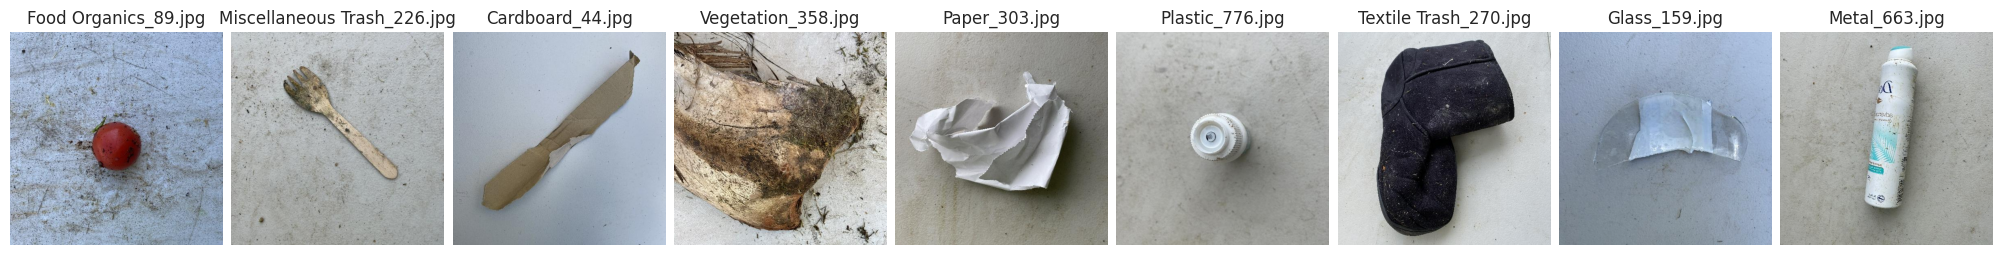

In [4]:
#Plotting the images
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(1, len(file_path_jpg), figsize=(20, 10))

for ax, file_path in zip(axes, file_path_jpg):
    image = cv.imread(file_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color representation
    ax.imshow(image)
    ax.set_title(os.path.basename(file_path), fontsize=12)  # Adjust title font size and weight
    #ax.set_xlabel(image.shape[:2], fontsize=10)  # Show image dimensions as label
    ax.axis('off')  # Remove axes for a cleaner look

plt.tight_layout(pad=0.5)  # Add padding between subplots
plt.show()

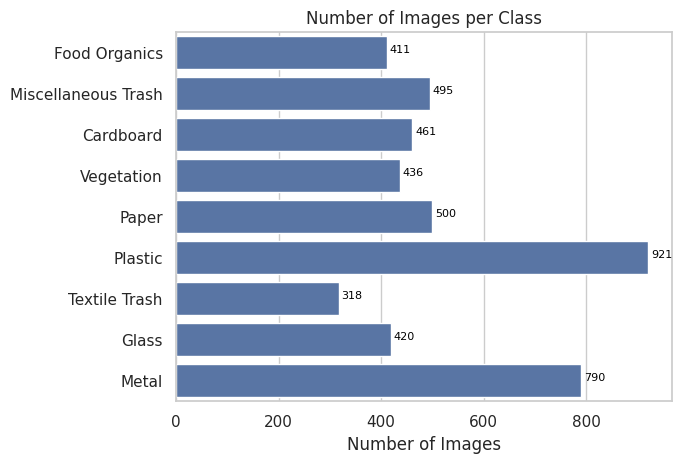

In [13]:
sns.set_theme(style='whitegrid')
sns.barplot(x=file_count.values(), y=classes)
plt.title('Number of Images per Class', fontsize=12)
plt.xlabel('Number of Images', fontsize=12)

# Annotate each bar with its count
for index, value in enumerate(file_count.values()):
    plt.text(value + 5, index, str(value), fontsize=8, color='black')
plt.show()